In [1]:
from google.colab import files
uploaded= files.upload()

Saving historical_data.csv to historical_data.csv


In [2]:
uploaded=files.upload()

Saving fear_greed_index.csv to fear_greed_index.csv


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
trader_df=pd.read_csv("historical_data.csv")
sentiment_df=pd.read_csv("fear_greed_index.csv")

In [5]:
print(trader_df.head())

                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

   Closed PnL                                   Transaction Hash     Order ID  \
0         0.0  0xec0945

In [6]:
print(sentiment_df.head())

    timestamp  value classification        date
0  1517463000     30           Fear  2018-02-01
1  1517549400     15   Extreme Fear  2018-02-02
2  1517635800     40           Fear  2018-02-03
3  1517722200     24   Extreme Fear  2018-02-04
4  1517808600     11   Extreme Fear  2018-02-05


In [7]:
print(trader_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [8]:
print(trader_df.describe())

       Execution Price   Size Tokens      Size USD  Start Position  \
count    211224.000000  2.112240e+05  2.112240e+05    2.112240e+05   
mean      11414.723350  4.623365e+03  5.639451e+03   -2.994625e+04   
std       29447.654868  1.042729e+05  3.657514e+04    6.738074e+05   
min           0.000005  8.740000e-07  0.000000e+00   -1.433463e+07   
25%           4.854700  2.940000e+00  1.937900e+02   -3.762311e+02   
50%          18.280000  3.200000e+01  5.970450e+02    8.472793e+01   
75%         101.580000  1.879025e+02  2.058960e+03    9.337278e+03   
max      109004.000000  1.582244e+07  3.921431e+06    3.050948e+07   

          Closed PnL      Order ID            Fee      Trade ID     Timestamp  
count  211224.000000  2.112240e+05  211224.000000  2.112240e+05  2.112240e+05  
mean       48.749001  6.965388e+10       1.163967  5.628549e+14  1.737744e+12  
std       919.164828  1.835753e+10       6.758854  3.257565e+14  8.689920e+09  
min   -117990.104100  1.732711e+08      -1.175712

**CLEANING** THE DATA

In [9]:
trader_df['time']=pd.to_datetime(trader_df['Timestamp IST'],format='%d-%m-%Y %H:%M')

In [10]:
sentiment_df['time']=pd.to_datetime(sentiment_df['date'])

In [11]:
print(trader_df['time'].head())
print(trader_df.dtypes)

0   2024-12-02 22:50:00
1   2024-12-02 22:50:00
2   2024-12-02 22:50:00
3   2024-12-02 22:50:00
4   2024-12-02 22:50:00
Name: time, dtype: datetime64[ns]
Account                     object
Coin                        object
Execution Price            float64
Size Tokens                float64
Size USD                   float64
Side                        object
Timestamp IST               object
Start Position             float64
Direction                   object
Closed PnL                 float64
Transaction Hash            object
Order ID                     int64
Crossed                       bool
Fee                        float64
Trade ID                   float64
Timestamp                  float64
time                datetime64[ns]
dtype: object


In [12]:
print(sentiment_df['time'].head())
print(sentiment_df.dtypes)

0   2018-02-01
1   2018-02-02
2   2018-02-03
3   2018-02-04
4   2018-02-05
Name: time, dtype: datetime64[ns]
timestamp                  int64
value                      int64
classification            object
date                      object
time              datetime64[ns]
dtype: object


In [13]:
trader_df['date_only']=trader_df['time'].dt.normalize()
sentiment_df['date_only']=sentiment_df['time'].dt.normalize()


In [14]:
print(trader_df['date_only'].min(), trader_df['date_only'].max())
print(sentiment_df['date_only'].min(), sentiment_df['date_only'].max())

common_dates = set(trader_df['date_only']).intersection(set(sentiment_df['date_only']))
print("Number of common dates:", len(common_dates))

2023-05-01 00:00:00 2025-05-01 00:00:00
2018-02-01 00:00:00 2025-05-02 00:00:00
Number of common dates: 479


Analysis of **cumulative PnL** over time

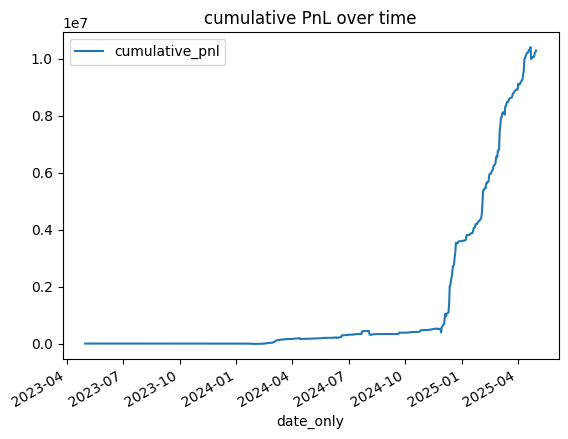

In [15]:
trader_daily=trader_df.groupby('date_only')['Closed PnL'].sum().reset_index(name='daily_pnl')
trader_daily['cumulative_pnl']=trader_daily['daily_pnl'].cumsum()
trader_daily.plot(x='date_only',y='cumulative_pnl',title='cumulative PnL over time')
plt.show()

Distribution of PnL by Side

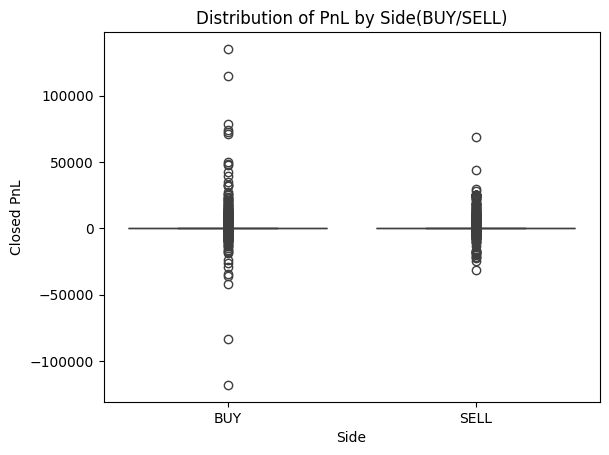

In [16]:
sns.boxplot(x='Side',y='Closed PnL',data=trader_df)
plt.title('Distribution of PnL by Side(BUY/SELL)')
plt.show()

Top 10 coins by total PnL

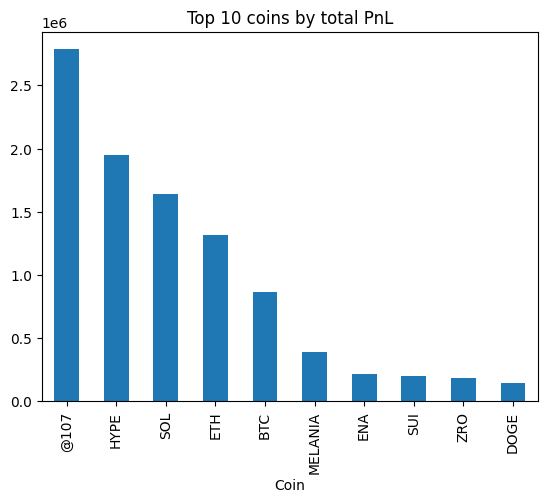

In [17]:
top_coins=trader_df.groupby('Coin')['Closed PnL'].sum().sort_values(ascending=False).head(10)
top_coins.plot(kind='bar',title='Top 10 coins by total PnL')
plt.show()

In [18]:
total_pnl=trader_df['Closed PnL'].sum()
avg_daily_pnl=trader_df['Closed PnL'].mean()
win_rate = (trader_df['Closed PnL'] > 0).mean()
max_drawdown = (trader_daily['cumulative_pnl'] - trader_daily['cumulative_pnl'].cummax()).min()
sharpe_ratio = trader_daily['daily_pnl'].mean() / trader_daily['daily_pnl'].std()

In [19]:
print("Performance Metrics:")
print(f"Total PnL: {total_pnl:.2f}")
print(f"Average Daily PnL: {avg_daily_pnl:.2f}")
print(f"Win Rate: {win_rate:.2%}")
print(f"Max Drawdown: {max_drawdown:.2f}")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")

Performance Metrics:
Total PnL: 10296958.94
Average Daily PnL: 48.75
Win Rate: 41.13%
Max Drawdown: -419020.23
Sharpe Ratio: 0.30


PnL vs Hour of day

/tmp/ipython-input-3568964693.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_pnl.index, y=hourly_pnl.values, palette="coolwarm")


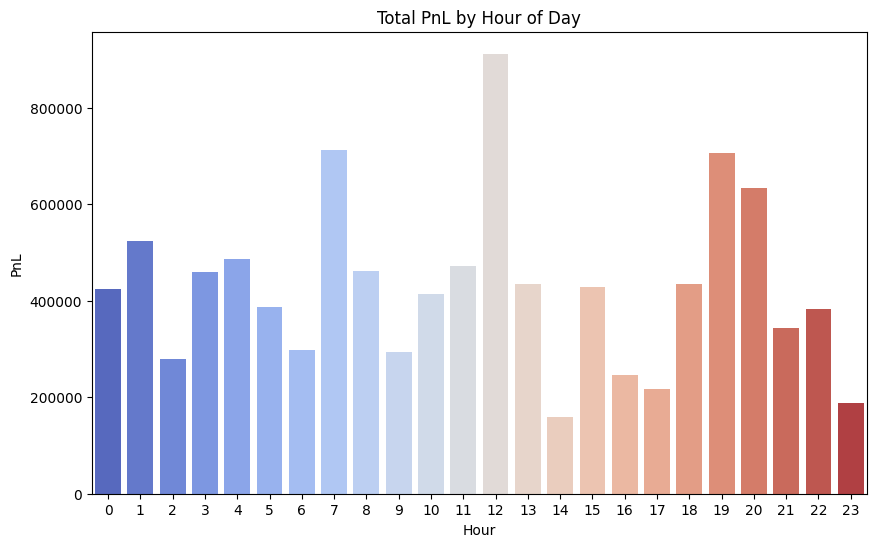

In [20]:
trader_df['hour'] = pd.to_datetime(trader_df['Timestamp IST'], format='%d-%m-%Y %H:%M').dt.hour
hourly_pnl = trader_df.groupby('hour')['Closed PnL'].sum()
plt.figure(figsize=(10,6))
sns.barplot(x=hourly_pnl.index, y=hourly_pnl.values, palette="coolwarm")
plt.title("Total PnL by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("PnL")
plt.show()

Total PnL by Day of Week

/tmp/ipython-input-610041659.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dow_pnl.index, y=dow_pnl.values, palette="mako")


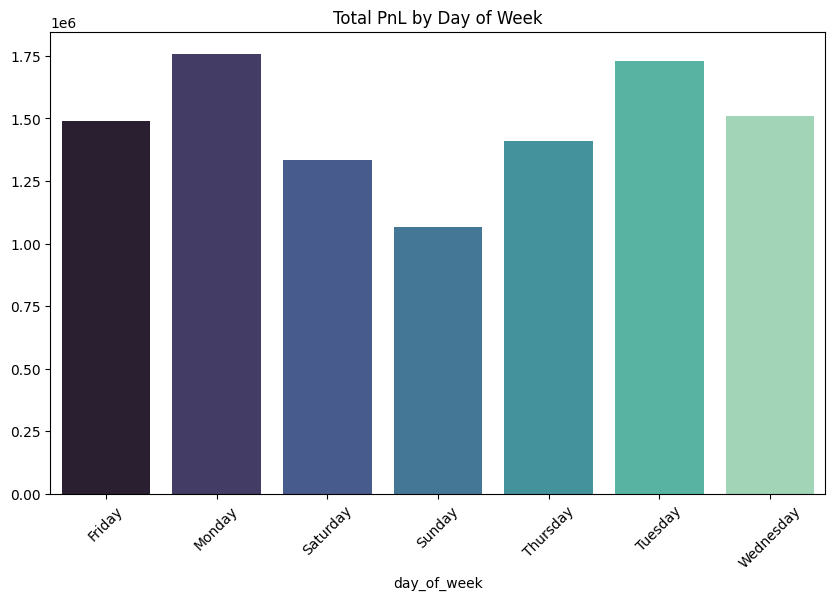

In [21]:
trader_df['day_of_week'] = pd.to_datetime(trader_df['Timestamp IST'], format='%d-%m-%Y %H:%M').dt.day_name()
dow_pnl = trader_df.groupby('day_of_week')['Closed PnL'].sum()
plt.figure(figsize=(10,6))
sns.barplot(x=dow_pnl.index, y=dow_pnl.values, palette="mako")
plt.title("Total PnL by Day of Week")
plt.xticks(rotation=45)
plt.show()

daily market sentiment

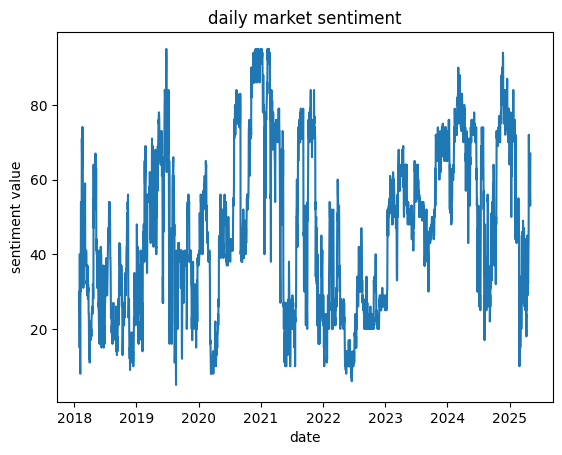

In [22]:
sentiment_daily=sentiment_df.groupby('date_only')['value'].mean().reset_index(name='daily_sent')
sentiment_daily = sentiment_daily.sort_values('date_only').dropna()
plt.plot(sentiment_daily['date_only'],sentiment_daily['daily_sent'])
plt.title('daily market sentiment')
plt.xlabel('date')
plt.ylabel('sentiment value')
plt.show()

Merging the two datasets to analyse sentiment and performance of the trader

In [23]:
merged_df = pd.merge(
    trader_df,
    sentiment_df,
    on="date_only",
    how="inner"
)

In [24]:
print("Merged shape:", merged_df.shape)
print(merged_df.head())

Merged shape: (211218, 25)
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

   Closed PnL  ...     Timestamp              time_x  date_only  hour  \
0   

Making **trader_daily** dataset to analyse daily performance of the trader

In [25]:
trader_daily=trader_df.groupby('date_only')['Closed PnL'].sum().reset_index(name='daily_pnl')
merged_daily=pd.merge(
    trader_daily,
    sentiment_df[['date_only','value']],
    on='date_only',
    how='inner'
)
print("Merged daily shape:", merged_daily.shape)
print(merged_daily.head())

Merged daily shape: (479, 3)
   date_only   daily_pnl  value
0 2023-05-01    0.000000     63
1 2023-12-05    0.000000     75
2 2023-12-14 -205.434737     72
3 2023-12-15  -24.632034     70
4 2023-12-16    0.000000     67


In [26]:
merged_daily['pnl_roll7']=merged_daily['daily_pnl'].rolling(7,min_periods=1).mean()
merged_daily['sent_roll7']=merged_daily['value'].rolling(7,min_periods=1).mean()


In [27]:
corr=merged_daily[['daily_pnl','value']].corr()
print("correlation between trader PnL and sentiment:\n",corr)

correlation between trader PnL and sentiment:
            daily_pnl     value
daily_pnl   1.000000 -0.082642
value      -0.082642  1.000000


Trader Performance vs Market Sentiment (Dual Axis)

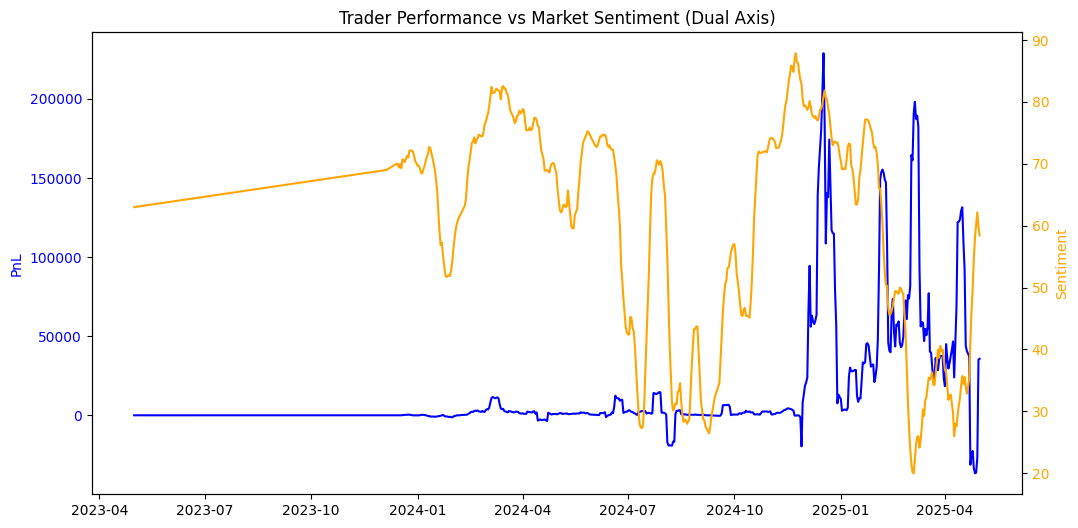

In [28]:
fig, ax1 = plt.subplots(figsize=(12,6))

# PnL on left y-axis
ax1.plot(merged_daily['date_only'], merged_daily['pnl_roll7'], label="7D Avg PnL", color='blue')
ax1.set_ylabel("PnL", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Sentiment on right y-axis
ax2 = ax1.twinx()
ax2.plot(merged_daily['date_only'], merged_daily['sent_roll7'], label="7D Avg Sentiment", color='orange')
ax2.set_ylabel("Sentiment", color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Title
plt.title("Trader Performance vs Market Sentiment (Dual Axis)")
plt.show()

**Predictive Model**: CatBoostClassifier to predict next-day positive PnL

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [30]:
merged_daily['target']=(merged_daily['daily_pnl'].shift(-1)>0).astype(int)
merged_daily=merged_daily.dropna()#drop last value

In [31]:
merged_daily['pnl_roll30']=merged_daily['daily_pnl'].rolling(30,min_periods=1).mean()
merged_daily['sent_roll30']=merged_daily['value'].rolling(30,min_periods=1).mean()

In [32]:
X=merged_daily[['daily_pnl','pnl_roll7','pnl_roll30','value','sent_roll7','sent_roll30']]
y=merged_daily['target']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [46]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.1 MB/s eta 0:00:00


In [61]:
from catboost import CatBoostClassifier
cat_model = CatBoostClassifier(
    iterations=300,
    learning_rate=0.05,
    depth=5,
    class_weights=[5, 1],
    random_state=42,
    verbose=0
)

In [62]:
cat_model.fit(X_train, y_train)

In [63]:
y_pred = cat_model.predict(X_test)

In [64]:
print("CatBoost Results:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

CatBoost Results:
              precision    recall  f1-score   support

           0       0.16      0.36      0.22        11
           1       0.90      0.75      0.82        85

    accuracy                           0.71        96
   macro avg       0.53      0.56      0.52        96
weighted avg       0.82      0.71      0.75        96

Confusion Matrix:
 [[ 4  7]
 [21 64]]
